<a href="https://colab.research.google.com/github/chsanabriam/Esatdistica_Aplicada/blob/master/basicos_univariado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis Univariado

##Población y muestra

**Población:** es el conjunto de elementos que son objeto de estudio estadístico.

**Individuo:** cada uno de los elementos de la población. El número total de individuos de la población se suele representar por la letra **$N$**.

A veces, es necesario estudiar a todos los individuos de la población. En este caso se trata de un estudio **exhaustivo**. Por ejemplo, cuando se realiza el censo de población de una determinada ciudad. En general, es muy costoso, en tiempo y dinero; entrevistar a todos los elementos objeto del estudio. Por ello, se selecciona solo una parte y en este caso se dice que se trata de un estudio **muestral**.

**Muestra:** es una parte de la población con la que realmente se realiza el estudio.

**Tamaño:** es el número de elementos del que se compone la muestra y se suele representar por la letra **$n$**



## Muestreos aleatorios
**Muestreo aleatorio simple:** se trata de obtener, mediante un método aleatorio, los individuos de la muestra entre los que forman la población. Este tipo de muestreo se realiza cuando los individuos de la población que vamos a estudiar tienen características parecidas.

**Muestreo aleatorio estratificado:** se trata de dividir la población en grupos (llamados estratos) de características parecidas. De cada grupo se seleccionarán mediante un método aleatorio algunos individuos. El número de individuos obtenidos de cada grupo puede ser el mismo, (en cuyo caso se dice que se realiza mediante **afijación igual** o proporcional al número de individuos que hay en total en dicho grupo con respecto al total de la población (en cuyo caso se llama **afijación proporcional** ). Este tipo de muestreo nos permite obtener más información ya que, aparte de sacar resultados sobre el total de la población, nos da también información sobre los grupos (estratos) que lo forman. 
	

###Ejercicio muestreo
Se quiere realizar un estudio estadístico mediante muestreo estratificado aleatorio de cierto tipo de información de una biblioteca. Esta contiene un total de 2000 libros distribuidos de la siguiente forma:

* 800 libros de Literatura.
* 400 libros de Geografía e Historia.
* 500 libros de ciencia.
* 300 libros de otros contenidos.

Para el estudio se quiere tomar una muestra de 180 libros y considerar como estratos los grupos de libros anteriores.

Resuelve las siguientes cuestiones:

a) Valor de $N$ (tamaño de la población)  y de $n$ (tamaño de la muestra).

b) Número de libros que hay que seleccionar para la muestra de cada uno de los distintos estratos si se realiza mediante afijación igual.

c) Número de libros que hay que seleccionar para la muestra de cada uno de los distintos estratos si se realiza mediante afijación proporcional.

In [2]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
np.random.seed(123) # para poder replicar los números aleatorios

In [3]:
lista_libros = [['literatura',800],['geograf_&_historia',400],\
                ['ciencia',500],['otros',300]]
libros = np.array(lista_libros).astype(object)
libros[:,1] = libros[:,1].astype(int)

In [4]:
libros

array([['literatura', 800],
       ['geograf_&_historia', 400],
       ['ciencia', 500],
       ['otros', 300]], dtype=object)

In [5]:
n = 180
N = np.sum(libros[:,1])
print(f'N = {N}; n = {n}')

N = 2000; n = 180


In [6]:
naf_igual = n / len(np.unique(libros[:,0]))
print(f'num. elementos af. igual: {naf_igual}')

num. elementos af. igual: 45.0


In [7]:
p = libros[:,1]*n/N
p

array([72.0, 36.0, 45.0, 27.0], dtype=object)

## Tipos de datos
**Cualitativas:** son aquellas en la que los resultados posibles no son valores numéricos. Por ejemplo: color del pelo, tipo de ropa preferida, lugar a donde vas a vacaciones, etc.

**Cuantitativas:** aquellas cuyo resultado es un número. A su vez, las hay de dos tipos:
* **Cuantitativas discretas:** cuando se toman valores aislados. Por ejemplo: número de amigos de tu clase, número de veces que vas al cine al mes, número de automoviles que tiene tu familia.
* **Cuantitativas continuas:** cuando, entre dos valores cualesquiera, puede haber valores intermedios. Es decir, se toman todos los valores de un determinado intervalo. Por ejemplo: peso de las personas, nivel sobre el mar en que se encuentra tu ciudad, medida del perímetro torácico.


## Tabla de frecuencias e histográma de frecuencias

Representar los datos de manera directa, concisa y visualmente atractiva se hace en Estadística mediante la **tabulación** de la variable estadística o del atributo.

Realizar una **tabulación** consiste en elaborar tablas simples, fáciles de leer y que de manera general ofrezcan una acertada visión de las características más importantes de la distribución.

La forma más común es por medio de **tablas de frecuencias**.

 **Frecuencia absoluta:** el número de veces que se repite cada valor o dato de la variable, y se representa generalmente como $n_i$.

**Frecuencia relativa:** se obtiene por cociente entre la
frecuencia absoluta ($n_i$) y el número total de datos ($N$). Esta se representa generalmente como $f_i$.

**Histográma de frecuencias:** es un gráfico que muestra por medio de barras la distribución de frecuencias de una o más variables.

Un histográma tiene diferentes beneficios dependiendo del uso que se le dé. Es común que en las empresas y comunidades se usen para:

* Tomar de decisiones con base en la representación de los datos.
* Mostrar información de interés general, por eso es común que el departamento de control de calidad los difunda.
* Analizar rendimientos de procesos
* Evidenciar cambios ante intervenciones (antes y después)
Y un largo etc. Los beneficios dependerán de la interpretación del histograma.

###Ejemplo frecuencia absoluta y relativa con datos sin agrupar
Precios de los menus durante un día de un restaurante en Madrid, España.

precio = [6, 8, 6, 8, 6, 8, 12, 6, 8, 8, 6, 8, 8, 8, 12, 12, 8, 8, 12, 6, 8, 6, 6, 8, 12, 6, 6, 6, 6, 6] euros



In [8]:
precio = np.array([6, 8, 6, 8, 6, 8, 12, 6, 8, 8, 6, 8, 8, 8, 12, 12, 8, 8, 12,\
                   6, 8, 6, 6, 8, 12, 6, 6, 6, 6, 6]) 

Tabular los datos y generar una tabla con frecuencia absoluta y frecuencia relativa

In [12]:
frecuencia_ab = np.unique(precio, return_counts=True)
frecuencia_ab

(array([ 6,  8, 12]), array([13, 12,  5]))

In [13]:
total_observaciones = len(precio)
frecuencia_rel = frecuencia_ab[1]/total_observaciones

In [14]:
# Dataframe para presentar una tabla de frecuencias
tabla_f = pd.DataFrame({'precio':frecuencia_ab[0],'ni':frecuencia_ab[1],\
                        'fi':frecuencia_rel})
tabla_f

,precio,ni,fi
0,6,13,0.433333
1,8,12,0.400000
2,12,5,0.166667


###Ejemplo frecuencia absoluta y relativa con datos agrupados

En el mismo restaurante se tiene que las propinas recibidas a lo largo de un día son:

propinas = [ 8, 0,  1,  6,  3,  3, 11,  5,  9,  7,  9,  2,  3, 11,  3,  3,  8,
       0,  6,  9,  7, 14,  6,  3,  0,  6, 12,  6, 11,  6,  1, 13, 14, 10,
        3,  4,  3,  1, 15, 13,  0,  5,  8, 13,  6, 14, 0, 1,  8,  9, 13,
        1,  0,  3, 13,  1,  3,  4, 14,  7, 13,  6, 12,  1,  4, 14, 12,  3,
       12,  3,  7,  6,  8,  6, 13, 12, 12, 0,  4,  4]

In [19]:
propinas = np.array([ 8, 0, 1, 6, 3, 3, 11, 5, 9, 7, 9, 2, 3, 11, 3, 3, 8, 0, 6,\
                     9, 7, 14, 6, 3, 0, 6, 12, 6, 11, 6, 1, 13, 14, 10, 3, 4, 3,\
                     1, 15, 13, 0, 5, 8, 13, 6, 14, 0, 1, 8, 9, 13, 1, 0, 3, 13,\
                     1, 3, 4, 14, 7, 13, 6, 12, 1, 4, 14, 12, 3, 12, 3, 7, 6, 8,\
                     6, 13, 12, 12, 0, 4, 4])

Dado que existen muchos valores diferentes de la variable
comprendidos entre 0 y 15 euros, para tener una visión de conjunto, las cantidades
pagadas se deben agrupar en clases o intervalos $\Delta x = [L_{i-1} - L_i]$.

In [20]:
min = np.min(propinas)
max = np.max(propinas)
print(f'propina mínima: {min}; propina máxima: {max}')

propina mínima: 0; propina máxima: 15


In [53]:
ancho_intervalo = 3
intervalos = int((max - min)/ancho_intervalo)
frecuencias = np.zeros(intervalos)
label = []
for i in range(intervalos):
  contador = 0
  li = i*ancho_intervalo
  lf = li + ancho_intervalo
  for p in propinas:
    if p >= li and p <= lf:
      contador += 1
  frecuencias[i] = contador
  label.append(str(li) + '-' + str(lf))  

In [54]:
tabla_f1 = pd.DataFrame({'Li-1 - Li':label, 'ni': frecuencias})
tabla_f1

,Li-1 - Li,ni
0,0-3,27.0
1,3-6,29.0
2,6-9,23.0
3,9-12,14.0
4,12-15,19.0


In [55]:
# Usando directamente pandas
df_propinas = pd.DataFrame({'propinas':propinas})
df_propinas.head()

,propinas
0,8
1,0
2,1
3,6
4,3


Se puede utilizar la función cut incorporada en pandas para hacer la segmentación $\Delta x = (L_{i-1} - L_i]$.
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html

In [62]:
ancho = 3
bins = np.zeros(6)
for i in range(-1,5):
  bins[i] = (i)*ancho
bins = np.sort(bins)
df_propinas['li_1-li'] = pd.cut(x=df_propinas['propinas'], bins=bins)

In [63]:
df_propinas['li_1-li'].value_counts()

(0.0, 3.0]     20
(3.0, 6.0]     17
(6.0, 9.0]     13
(9.0, 12.0]    10
(-3.0, 0.0]     7
Name: li_1-li, dtype: int64

### Ejemplo Histográma de frecuencias

##Usando stents para prevenir derrames cerebrales (strokes)

**Pregunta**

¿El uso de stents previene los derrames cerebrales?

**Definiciones**

https://www.healthline.com/health/stent

https://www.medicinenet.com/script/main/art.asp?articlekey=9791#:~:text=Medical%20Definition%20of%20Stroke&text=Stroke%3A%20The%20sudden%20death%20of,the%20body%20can%20be%20symptoms.

* 451 pacientes distribuidos aleatoreamente en dos grupos (control y tratamiento)
* Se estudio el efecto del stent en dos momentos: 30 días y 365 días.


In [ ]:
!wget https://www.openintro.org/data/csv/stent30.csv

--2020-08-28 10:23:59--  https://www.openintro.org/data/csv/stent30.csv
Resolving www.openintro.org (www.openintro.org)... 192.185.65.127
Connecting to www.openintro.org (www.openintro.org)|192.185.65.127|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9845 (9.6K) [text/csv]
Saving to: ‘stent30.csv’

stent30.csv         100%[===================>]   9.61K  --.-KB/s    in 0s      

2020-08-28 10:23:59 (147 MB/s) - ‘stent30.csv’ saved [9845/9845]



In [ ]:
!wget https://www.openintro.org/data/csv/stent365.csv

--2020-08-28 10:23:59--  https://www.openintro.org/data/csv/stent365.csv
Resolving www.openintro.org (www.openintro.org)... 192.185.65.127
Connecting to www.openintro.org (www.openintro.org)|192.185.65.127|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9791 (9.6K) [text/csv]
Saving to: ‘stent365.csv’

stent365.csv        100%[===================>]   9.56K  --.-KB/s    in 0s      

2020-08-28 10:24:00 (141 MB/s) - ‘stent365.csv’ saved [9791/9791]



In [ ]:
dfstents30 = pd.read_csv('stent30.csv')
dfstents365 = pd.read_csv('stent365.csv')

In [ ]:
matriz30 = pd.DataFrame.to_numpy(dfstents30)
matriz365 = pd.DataFrame.to_numpy(dfstents365)

In [ ]:
grupos30 = np.array(np.unique(matriz30[:,0], return_counts=True))
grupos30

array([['control', 'treatment'],
       [227, 224]], dtype=object)

In [ ]:
grupos365 = np.array(np.unique(matriz365[:,0], return_counts=True))
grupos365

array([['control', 'treatment'],
       [227, 224]], dtype=object)

In [ ]:
eventos30 = np.array(np.unique(matriz30[:,1], return_counts=True))
eventos30

array([['no event', 'stroke'],
       [405, 46]], dtype=object)

In [ ]:
eventos365 = np.array(np.unique(matriz365[:,1], return_counts=True))
eventos365

array([['no event', 'stroke'],
       [378, 73]], dtype=object)

Text(0.5, 1.0, 'Grupo tratamiento [0-365] días')

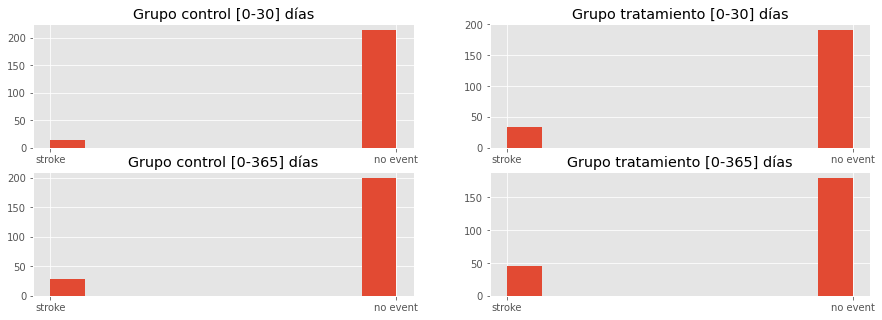

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(221)
plt.hist(matriz30[matriz30[:,0]=='control'][:,1])
plt.title('Grupo control [0-30] días')
plt.subplot(222)
plt.hist(matriz30[matriz30[:,0]=='treatment'][:,1])
plt.title('Grupo tratamiento [0-30] días')
plt.subplot(223)
plt.hist(matriz365[matriz365[:,0]=='control'][:,1])
plt.title('Grupo control [0-365] días')
plt.subplot(224)
plt.hist(matriz365[matriz365[:,0]=='treatment'][:,1])
plt.title('Grupo tratamiento [0-365] días')

**Respuesta**

R: ?

Referencia  
* Chimowitz MI, Lynn MJ, Derdeyn CP, et al. 2011. Stenting versus Aggressive Med- ical Therapy for Intracranial Arterial Stenosis. New England Journal of Medicine 365:993- 1003. www.nejm.org/doi/full/10.1056/NEJMoa1105335. NY Times article reporting on the study: www.nytimes.com/2011/09/08/health/research/08stent.html.

##Medidas de tendencia central

###Media aritmética
La media aritmética es el valor obtenido al sumar todos los datos y dividir el resultado entre el número total elementos. Se suele representar con $\bar{x}$ (o a veces con $\mu$). Si tenemos una muestra de $n$ valores, $x_i$, la media aritmética, $\bar{x}$, es la suma de los valores divididos por el numero de elementos $n$; en otras palabras:

$$ \bar{x} = \frac{1}{n}\sum_i x_i$$

La media aritmética también se puede calcular a partir de la frecuencia absoluta:

$$\bar{x} = \frac{\sum_i x_i\cdot n_i}{\sum_i n_i}$$



####Ejemplo de mediana aritmética con valores enteros

In [ ]:
datos_enteros = np.random.randint(1,100,10000) # 10 mil números enteros entre 1 y 99
datos_enteros.shape

(10000,)

In [ ]:
np.mean(datos_enteros)

50.4902

Media aritmética a partir de los datos.

In [ ]:
media = np.sum(datos_enteros)/len(datos_enteros)
media

50.4902

Media aritmética usando la frecuencia absoluta.

In [ ]:
frecuencia_absoluta = np.unique(datos_enteros, return_counts=True)
frecuencia_absoluta

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
        69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
        86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 array([107,  91, 110,  97,  97,  99,  96,  87,  92,  75, 129, 105, 100,
        101,  97,  97,  99, 115, 105, 109,  96, 102,  99,  97, 101, 120,
        102,  91,  95,  97,  96,  97, 106,  89,  89,  89, 110,  75, 104,
         97, 108,  82,  92, 100, 114,  97, 107,  96, 100, 101, 107, 109,
        114,  89,  91,  73, 113,  97,  95, 115, 100, 102, 119,  90, 107,
        112, 100,  87, 116, 111,  81,  99, 106, 125,  93, 119, 109,  94,
         97, 104, 102,  86, 115, 110, 104,  94, 104, 106, 108, 106,  95,
        125,  98, 113, 105,  98,  98,  90, 

In [ ]:
np.sum(frecuencia_absoluta[0]*frecuencia_absoluta[1])/np.sum(frecuencia_absoluta[1])

50.4902

####Ejemplo de mediana aritmética con datos aleatorios

In [ ]:
datos = np.random.randn(5, 4) # datos normalmente distribuidos
datos

array([[-1.0856306 ,  0.99734545,  0.2829785 , -1.50629471],
       [-0.57860025,  1.65143654, -2.42667924, -0.42891263],
       [ 1.26593626, -0.8667404 , -0.67888615, -0.09470897],
       [ 1.49138963, -0.638902  , -0.44398196, -0.43435128],
       [ 2.20593008,  2.18678609,  1.0040539 ,  0.3861864 ]])

In [ ]:
datos.mean() # Calcula la media aritmetica

0.11441773195529023

In [ ]:
np.mean(datos) # Mismo resultado

0.11441773195529023

In [ ]:
datos.mean(axis=1) # media aritmetica de cada fila

array([-0.32790034, -0.4456889 , -0.09359982, -0.0064614 ,  1.44573912])

In [ ]:
np.mean(datos, axis=1) # mismo resultado

array([-0.32790034, -0.4456889 , -0.09359982, -0.0064614 ,  1.44573912])

In [ ]:
datos.mean(axis=0) # media aritmetica de cada columna

array([ 0.65980502,  0.66598513, -0.45250299, -0.41561624])

###Media aritmética ponderada
La media aritmética ponderada es el valor obtenido al sumar el producto entre el dato y el peso que este tiene y dividir por la suma de los pesos. La representación más común de la media aritmética ponderada es $\bar{x_p}$ y su formula es:
$$ \bar{x_p} = \frac{\sum_i x_i \cdot w_i}{\sum_i w_i}$$

Usando la frecuencia absoluta
$$ \bar{x_p} = \frac{\sum_i x_i \cdot w_i\cdot n_i}{\sum_i w_i\cdot n_i}$$

Un ejemplo de esto se puede ver en las notas de tres exámenes de un estudiante. Las notas de los tres exámenes de un alumno son 7, 5 y 9 (sobre 10). La media aritmética es $\bar{x} = 7$.

Supongamos que el peso de cada examen es 25%, 35% y 40%. Calculamos la media ponderada:

$$\bar{x_p} = \frac{7\cdot25 + 5 \cdot 35 + 9 \cdot 40}{25 + 35 + 40}= 7.1$$


###Mediana
Mediana: La mediana es el valor que ocupa el lugar central de todos los datos cuando éstos están ordenados de menor a mayor. Se representa con $\tilde{x}$

### ejemplo
Si tenemos los números 9,3,1,8,3,6.

Entonces la media aritmética es:
```
9+3+1+8+3+6 = 30
30 / 5 = 6
```
Mientras que la mediana es:
```
1,3,3,6,8,9 => mediana = 4.5
````


###Moda
La moda es el valor que tiene mayor frecuencia absoluta. En un histograma de frecuencias la moda se visualiza como el pico más "prominente". Los histogramas pueden tener uno, dos o más picos prominentes y en ese caso se dice que las distribuciones son unimodales, bimodales o multimodales respectivamente.

#### Ejemplo Media, Mediana y Moda
Calcular la edad promedio, la mediana y la moda en un colegio de mil estudiantes que estan entre los  y los 14 años. Dibujar el histrograma de frecuencias, junto con los valores de la media y la mediana.

In [ ]:
edad_estudiantes = np.random.randint(7, 15, 1000)
edad_estudiantes.shape

(1000,)

In [ ]:
print(f'El valor promedio es {np.mean(edad_estudiantes)} años')
print(f'La mediana es {np.median(edad_estudiantes)} años')

El valor promedio es 10.624 años
La mediana es 11.0 años


In [ ]:
freq = np.unique(edad_estudiantes, return_counts=True)
freq

(array([ 7,  8,  9, 10, 11, 12, 13, 14]),
 array([117, 132, 108, 124, 109, 128, 146, 136]))

In [ ]:
stats.mode(edad_estudiantes)

ModeResult(mode=array([13]), count=array([146]))

In [ ]:
print(f'La moda es {stats.mode(edad_estudiantes)[0].item()} años')

La moda es 13 años


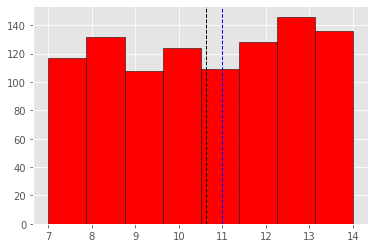

In [ ]:
plt.hist(edad_estudiantes, bins=, color='r', edgecolor='k')
plt.axvline(np.mean(edad_estudiantes), color='k', linestyle='dashed', linewidth=1)
plt.axvline(np.median(edad_estudiantes), color='b', linestyle='dashed', linewidth=1)

##Medidas de variabilidad
Son intervalos que indican la dispersión de los datos en la escala de medición. Una medida de dispersión o variabilidad nos determina el grado de acercamiento o distanciamiento de los valores de una distribución frente a su promedio de localización, indicando por medio de un número si las diferentes puntuaciones de una variable están muy alejadas de la media. Cuanto mayor sea ese valor, mayor será la variabilidad, y cuanto menor sea, más homogénea será a la media. Cuando es cero quiere decir que todos los datos son iguales.

###Desviación respecto a la media
La desviación respecto a la media es la diferencia en valor absoluto entre cada valor de la variable estadística y la media aritmética.
$$D_i = |x_i - \bar{x}|$$

###Varianza
La varianza es la media aritmética del cuadrado de las desviaciones respecto a la media de una distribución estadística. La varianza intenta describir la dispersión de los datos. Se representa como $\sigma^2$.

$$\sigma^2 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n}$$

###Desviación estandar
La desviación estandar es la raíz cuadrada de la varianza. Se representa con la letra griega $\sigma$.

$$\sigma = \sqrt{\frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n}}$$

###Ejemplo

In [72]:
datos = np.random.randn(5, 4) # datos normalmente distribuidos
datos

array([[-0.83690774,  0.45987201, -1.42670038, -0.55672975],
       [ 0.17983988, -2.14446388, -0.72708899,  0.30741813],
       [-0.38753876, -0.80352208,  0.93898923,  0.43781947],
       [ 1.14109158,  0.17145177, -1.54957884, -0.97402348],
       [-1.0491106 , -0.46483438, -0.49055989,  1.0007457 ]])

In [73]:
# varianza
np.var(datos) 

0.7663389597869844

In [74]:
np.var(datos, 0) # varianza de cada columna

array([0.62083343, 0.83079548, 0.79375026, 0.50741774])

In [75]:
 # Desviación típica
np.std(datos)

0.8754078819538835

In [76]:
np.std(datos, 0) # Desviación típica de cada columna

array([0.78792984, 0.91147983, 0.89092663, 0.71233261])

##Medidas de localización
Las medidas de localización dividen la distribución en partes iguales, sirven para clasificar a un individuo o elemento dentro de una determinada población o muestra.

###Cuartiles
Medida de localización que divide la población o muestra en cuatro partes iguales.

* $Q_1$ = Valor de la variable que deja a la izquierda el 25% de la distribución.
* $Q_2$ = Valor de la variable que deja a la izquierda el 50% de la distribución = mediana.
* $Q_3$ = Valor de la variable que deja a la izquierda el 75% de la distribución.


###Deciles
Medida de localización que divide la población o muestra en 10 partes iguales. Es utilizada en  variables continuas.

$d_k$ = Decil k-simo es aquel valor de la variable que deja a su izquierda el k·10 % de la distribución.

###Percentiles
Medida de localización que divide la población o muestra en 100 partes iguales y su uso es muy común para las variables continuas.

$p_k$ = Percentil k-simo es aquel valor de la variable que deja a su izquierda el k % de la distribución.

## Ejercicio general
Iris data

In [68]:
from sklearn.datasets import load_iris   
iris_obj = load_iris()

In [70]:
iris = pd.DataFrame(iris_obj.data, columns=iris_obj.feature_names,index=pd.Index([i for i in range(iris_obj.data.shape[0])])).join(pd.DataFrame(iris_obj.target, columns=pd.Index(["species"]), index=pd.Index([i for i in range(iris_obj.target.shape[0])])))
iris # prints iris data
iris.species.replace({0: 'setosa', 1: 'versicolor', 2: 'virginica'}, inplace=True)


In [71]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
